## The purpose of this file
Solve the system of nonlinear equations to estimate nodes' activity level $\boldsymbol{\hat{a}}$.
$$
H_i(\boldsymbol{\hat{a}})\equiv\sum_{j:j\neq i}\frac{m_{ij}^o-\tau \hat{a_i}\hat{a_j}}{1-\hat{a_i}\hat{a_j}}=0, \forall\,i=1,...,N
$$

In [1]:
import sys
sys.path.append('../')
import numpy as np
import networkx as nx
import pandas as pd
import toolbox as tb
from scipy import optimize
%matplotlib inline

In [2]:
tag = "explore_hiroshima"
hashtag = "じゃけぇ広島に恋しとる" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
tau = 235
G = nx.read_graphml(f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml')

In [3]:
aam = nx.to_numpy_array(G)
n = len(aam)

In [4]:
def h(a):

    a = np.array(a)
    
    monomials = (aam - tau*(a.reshape(-1,1)@a.reshape(1,-1))) / (np.ones((n,n)) - (a.reshape(-1,1)@a.reshape(1,-1)))
    diag_ = np.diag_indices(n)
    monomials[diag_] = 0
    
    poly = monomials.sum(axis=1)
    return poly

In [5]:
# Initial value is given by a config model
a_init = tb.initial_value(aam, tau)
aam_mean = (aam/tau).mean(axis=1)

In [6]:
%%time
krylov_ai = optimize.root(h, a_init, method = "krylov")

CPU times: total: 1.75 s
Wall time: 1.77 s


In [7]:
%%time
arbitrary = np.array([0.001 for _ in range(n)])
#krylov_m = optimize.root(h, aam_mean, method = "krylov")
krylov_m = optimize.root(h, arbitrary, method = "krylov")

CPU times: total: 9min 7s
Wall time: 9min 11s


In [8]:
%%time
broyden1_ai = optimize.root(h, a_init, method = "broyden1")

CPU times: total: 8.59 s
Wall time: 8.74 s


In [9]:
tb.show_opt_result(krylov_ai, 'Newton-Krylov 法')
print()
tb.show_opt_result(krylov_m, 'Newton-Krylov 法（初期値変更）')
print()
tb.show_opt_result(broyden1_ai, 'good Broyden 法')

Newton-Krylov 法
success? : True
estimate : [0.03606478 0.0250334  0.03734797 ... 0.00404254 0.00360884 0.00360884]
missing value : 0
min : 0.0004330498773771906
max : 0.5157248476183302
maximum connection Prob u(a_i,a_j):0.23229700899332986
index of maximum value : (13, 18)

Newton-Krylov 法（初期値変更）
success? : True
estimate : [0.03606478 0.0250334  0.03734797 ... 0.00404254 0.00360884 0.00360884]
missing value : 0
min : 0.00043304987532929084
max : 0.5157248476312829
maximum connection Prob u(a_i,a_j):0.23229700913346368
index of maximum value : (13, 18)

good Broyden 法
success? : True
estimate : [0.03606478 0.0250334  0.03734797 ... 0.00404254 0.00360884 0.00360884]
missing value : 0
min : 0.00043304987731589373
max : 0.5157248475427747
maximum connection Prob u(a_i,a_j):0.23229700895083713
index of maximum value : (13, 18)


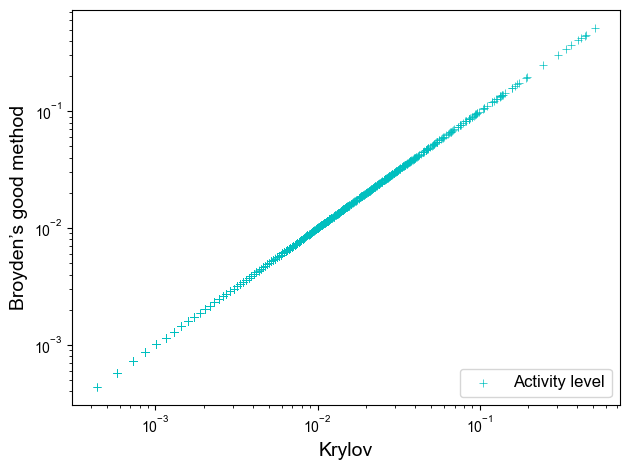

In [10]:
fname1 = f"../data/figure/estimates/estimates_{tag}_{timespan}_{tau}_scatter.pdf"
tb.plot_a_hat(krylov_ai, broyden1_ai, alpha=1, sep=False, fname=fname1)

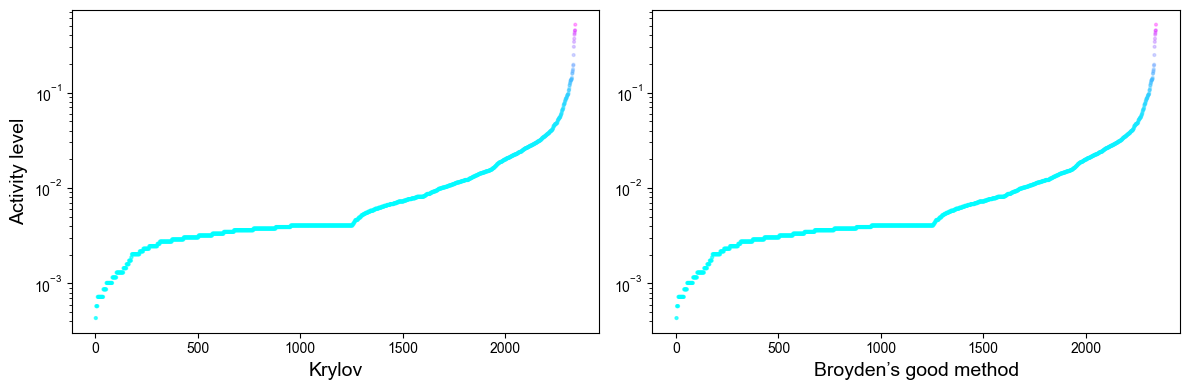

In [11]:
fname2 = f"../data/figure/estimates/estimates_{tag}_{timespan}_{tau}.pdf"
tb.plot_a_hat(krylov_ai, broyden1_ai, sep=True, fname=fname2)

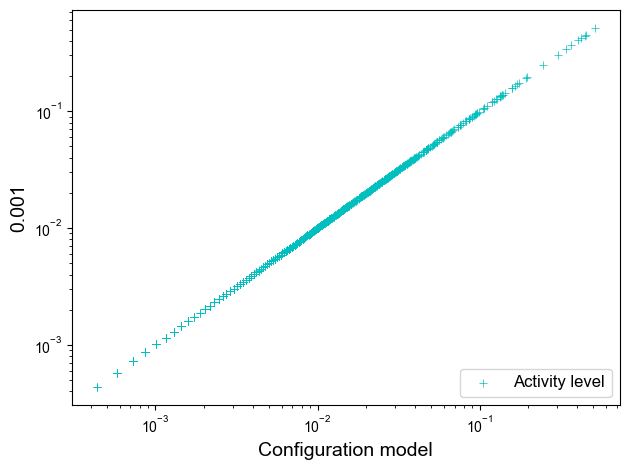

In [13]:
# for different initial guess
fname3 = f"../data/figure/estimates/estimates_{tag}_{timespan}_{tau}_init.pdf"
tb.plot_a_hat_match(krylov_ai, krylov_m, "Configuration model", "0.001", fname=fname3)

In [14]:
fn_krylov = f'../data/ML_estimate/{tag}/{timespan}_{tau}_krylov'
fn_broyden = f'../data/ML_estimate/{tag}/{timespan}_{tau}_broyden1'
fn_init = f'../data/ML_estimate/{tag}/{timespan}_{tau}_init'
tb.save_opt_result(krylov_ai, fn_krylov)
tb.save_opt_result(broyden1_ai, fn_broyden)
tb.save_opt_result(krylov_m, fn_init)